<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aaron Musselwhite 

9/15/22

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer              ##imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
games= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRJiyV_o3XPU0pvlMVCM8JrlpXl2hcP1hezOnFBGLQWZq3G0COBwVyOuakBhv31Lt9cgU18RSyBQpWp/pub?output=csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= games.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [ ]:
df =df.drop(columns=['Year_of_Release','Genre','User_Count','Developer','Critic_Count','Rating','Other_Sales'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Publisher     16665 non-null  object 
 3   NA_Sales      16719 non-null  float64
 4   EU_Sales      16719 non-null  float64
 5   JP_Sales      16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  8137 non-null   float64
 8   User_Score    7590 non-null   float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Critic_Score'].fillna(value = df['Critic_Score'].mean(), inplace = True)

In [ ]:
df['User_Score'].fillna(value = df['User_Score'].mean(), inplace = True)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
cat_selector(df)

['Name', 'Platform', 'Publisher']

In [ ]:
df_cat_data = df[cat_selector(df)]

df_cat_data

,Name,Platform,Publisher
0,Wii Sports,Wii,Nintendo
1,Super Mario Bros.,NES,Nintendo
2,Mario Kart Wii,Wii,Nintendo
3,Wii Sports Resort,Wii,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Nintendo
...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Tecmo Koei
16715,LMA Manager 2007,X360,Codemasters
16716,Haitaka no Psychedelica,PSV,Idea Factory
16717,Spirits & Spells,GBA,Wanadoo


In [ ]:
d_group= df.groupby('Platform')
d_group.head()

,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Wii,Nintendo,41.36,28.96,3.77,82.53,76.000000,8.000000
1,Super Mario Bros.,NES,Nintendo,29.08,3.58,6.81,40.24,68.967679,7.125046
2,Mario Kart Wii,Wii,Nintendo,15.68,12.76,3.79,35.52,82.000000,8.300000
3,Wii Sports Resort,Wii,Nintendo,15.61,10.93,3.28,32.77,80.000000,8.000000
4,Pokemon Red/Pokemon Blue,GB,Nintendo,11.27,8.89,10.22,31.37,68.967679,7.125046
...,...,...,...,...,...,...,...,...,...
13572,Sonic the Hedgehog 2 (8-bit),GG,Sega,0.00,0.00,0.04,0.04,68.967679,7.125046
14636,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,NEC,0.00,0.00,0.03,0.03,68.967679,7.125046
15078,Bust-A-Move,3DO,Micro Cabin,0.00,0.00,0.02,0.02,68.967679,7.125046
15562,Sotsugyou II: Neo Generation Special,3DO,Imageworks,0.00,0.00,0.02,0.02,68.967679,7.125046


In [ ]:
Plat_counts = df.Platform.value_counts(ascending=True)
Plat_counts.head()

PCFX    1
GG      1
TG16    2
3DO     3
WS      6
Name: Platform, dtype: int64

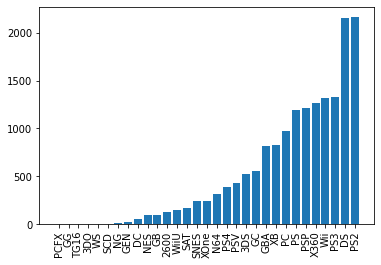

In [ ]:
plt.bar(Plat_counts.index, Plat_counts.values)
plt.xticks(rotation=90);

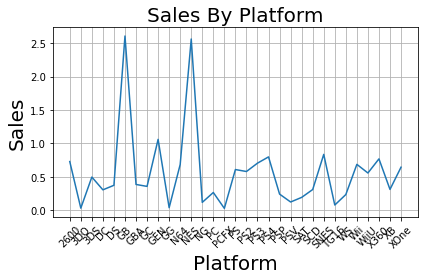

In [ ]:
plat_group = df.groupby('Platform').mean().reset_index()


fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(plat_group['Platform'], plat_group['Global_Sales'])
axes.set_title('Sales By Platform', fontsize=20)
axes.set_ylabel('Sales', fontsize=20)
axes.set_xlabel("Platform", fontsize=20)
axes.grid()
plt.xticks(rotation = 45);
plt.tight_layout()
plt.show()

based on the sales alone, Nintendo has had major success with a collection of their more famous platforms. With the N64 and NES, they were some of the most technologically advanced gaming systems of the time. Followed up by their venture into handheld gaming with the DS and The Gameboy and its off shoots(Gameboy color, Gameboy advance, etc..) they did something that no one else was really doing at the time and it paid dividends. What do they know that we dont? 

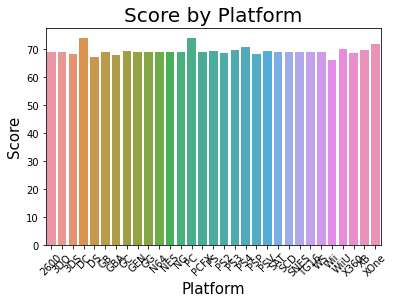

In [ ]:
sns.barplot(data=plat_group, x='Platform', y='Critic_Score')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Score by Platform', fontsize=20)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(rotation = 45);

While Critics rarely just straight up bomb a game (there are some) for the most part it is pretty standard across the industry. However, Nintendo released some of the most recognizable hand held games of the time and critics certainly noticed. With the rise of the PC gamer, just about every publisher tries to atleast release a version on the platform and some of the highest rated games these days are PC only thanks to their processing power. 